In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize']=[16,9]

def cubic(x,p0,p1,p2,p3):return p3*x*x*x+p2*x*x+p1*x+p0

In [20]:
f = open("brutal_00250.txt",'r')
inds, ss, errs = [], [], []
lines = f.readlines()
for line in lines:
    # print(line.split('\t'))
    inds.append(int(line.split('\t')[0]))
    ss.append(float(line.split('\t')[1]))
    errs.append(float(line.split('\t')[2][:-1]))

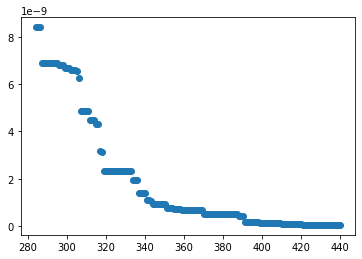

In [22]:
plt.scatter(inds,errs)

In [24]:
import Ising

d = dict(Ising.TrotterGate(1,1,0,0))
d

{'GA': array([[[ 0.73505259+0.j        ,  0.64864127+0.64864127j],
         [ 0.        +0.j        ,  0.        +0.j        ]],
 
        [[ 0.        +0.j        ,  0.        +0.j        ],
         [ 0.73505259+0.j        , -0.64864127-0.64864127j]]]),
 'GB': array([[[ 0.73505259+0.j        ,  0.64864127+0.64864127j],
         [ 0.        +0.j        ,  0.        +0.j        ]],
 
        [[ 0.        +0.j        ,  0.        +0.j        ],
         [ 0.73505259+0.j        , -0.64864127-0.64864127j]]])}

In [18]:
f = open('buff.txt','r')
lines = f.readlines()
ns, ds, avns, anns, aaas = [], [], [], [], []
for line in lines:
    print(line[:-1].split("\t"))
    ns.append(float(line[:-1].split("\t")[0]))
    ds.append(float(line[:-1].split("\t")[1]))
    avns.append(float(line[:-1].split("\t")[2]))
    aaas.append(float(line[:-1].split("\t")[3]))
    anns.append(float(line[:-1].split("\t")[4]))
ns = np.array(ns)
ds = np.array(ds)
anns = np.array(anns)
avns = np.array(avns)
aaas = np.array(aaas)

['1', '1', '16.0015', '15.9998', '-7.9974', 'BH_short_MPS_0.001_0.36_1.0']
['1', '2', '31.9914', '63.983', '-15.996', 'BH_short_PEPS_0.001_0.01_1.0']
['2', '2', '95.8726', '191.7414', '-47.9096', 'BH2_short_PEPS_5_9_0.01_1.0_0.001_20']
['2', '2', '95.4806', '191.991', '-48.4671', 'BH2_short_PEPS_5_9_0.36_1.0_0.001_20']
['2', '1', '48.0028', '47.966', '-23.9066', 'BH2_short_MPS_5_9_0.01_1.0_0.001_20']
['2', '1', '47.9596', '47.999', '-24.1672', 'BH2_short_MPS_5_9_0.36_1.0_0.001_20']
['1', '2', '32.022', '63.9617', '-15.9416', './BH_d=5_sud_28_7_1.0_4.9_0.001_500']
['1', '2', '32.022', '63.9617', '-15.9416', './BH_d=5_sud_28_7_1.0_4.9_0.001_500']


In [19]:
print(np.round(-5 * anns / (ns*(ns+1) * 2**(1*ds+1))))
print(np.round( 5 * avns / (ns*(ns+1) * 2**(1*ds+2))))
print(np.round( 5 * aaas / (ns*(ns+1) * 2**(2*ds+1))))

[5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5.]


In [20]:
print(ds)
print(ns*(ns+1))

[1. 2. 2. 2. 1. 1. 2. 2.]
[2. 2. 6. 6. 6. 6. 2. 2.]


[ 16.  16.  64.  64. 192. 192.  48.  48.]


In [153]:
mess = """#!/bin/bash
#PBS -N sudden_5_D_chi
#PBS -l cput=5000:00:00
#PBS -q mp16
#PBS -o shiva_sudden_5_D_chi.out
#PBS -e shiva_sudden_5_D_chi.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-15 python -u createFullBH_PEPS.py chi D 1 5 0.01 100 < /dev/null > shortPEPS_D_chi.out & 2> shortPEPS_D_chi.err &

wait"""

In [154]:
drr = {}

for key in inds:
    drr[key] = [[],[],[],[],[],[]]

pref = 'L'

for ind in inds:
    with open(('L' if pref=='L' else '')+'ctmrg_timing_'+ind+'.out') as f:
        lines = f.readlines()
    for line in lines:
        if len(line) > 8:
            if line[0:6] == "Timing":
                # print(line[7:8],"\t",line[9:-3])
                drr[ind][int(line[7:8])-1].append(float(line[9:-3]))

    for i in range(0,6):
        drr[ind][i] = np.array(drr[ind][i])
    for i in range(0,6):
        drr[ind][i] = [np.mean(drr[ind][i]),np.std(drr[ind][i])]
    drr[ind] = np.array(drr[ind])
    # print(ind,np.array(drr[ind]))

data=[]
for ind in inds:
    data.append(drr[ind])
data=np.array(data)

Initialize 	 [ 4.23621184e-03  6.36274924e-06 -4.73128356e-07  1.35217051e-08]
Halves 	 [ 7.71856517e-02 -3.40139281e-02  1.32653999e-02  3.35562469e-05]
QR 	 [-3.58860637e-03  1.29937332e-03  2.06282652e-03  4.36587208e-05]
Isometries 	 [-0.61900319  0.35676739 -0.0486171   0.00275716]
New Corners and Edges 	 [ 1.69828874e-02 -7.76423160e-03  3.13665139e-03 -6.30610538e-06]
New Rhos 	 [ 2.15467634e-02 -6.26510222e-03  2.89311187e-03  1.24793653e-05]


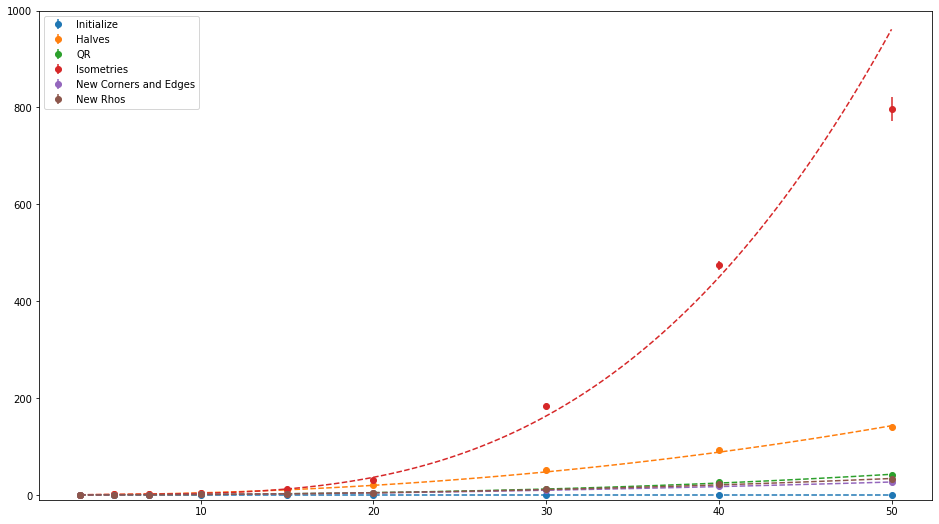

In [157]:
np.array(data).shape
labels = ['Initialize','Halves','QR','Isometries','New Corners and Edges','New Rhos']
colors = ['C'+str(i) for i in range(0,6)]
plt.clf()
#plt.yscale('log')
plt.ylim(-10,1000)

for i in range(6):
    popt,pcov=curve_fit(cubic,indsint,data[:,i,0],[1,1,1,1],sigma=data[:,i,1],absolute_sigma=True)
    print(labels[i],"\t",popt)
    if i==0: cpopt,cpcov = popt,pcov
    plt.errorbar(indsint,(4 if pref=='L' else 2)*data[:,i,0],data[:,i,1],fmt='o',label=labels[i],color=colors[i])
    plt.plot(np.linspace(indsint.min(),indsint.max(),100),(4 if pref=='L' else 2)*cubic(np.linspace(indsint.min(),indsint.max(),100),*popt),linestyle='dashed',color=colors[i])

plt.legend()
plt.savefig('Estimated_time_'+pref+'.png')
plt.show()

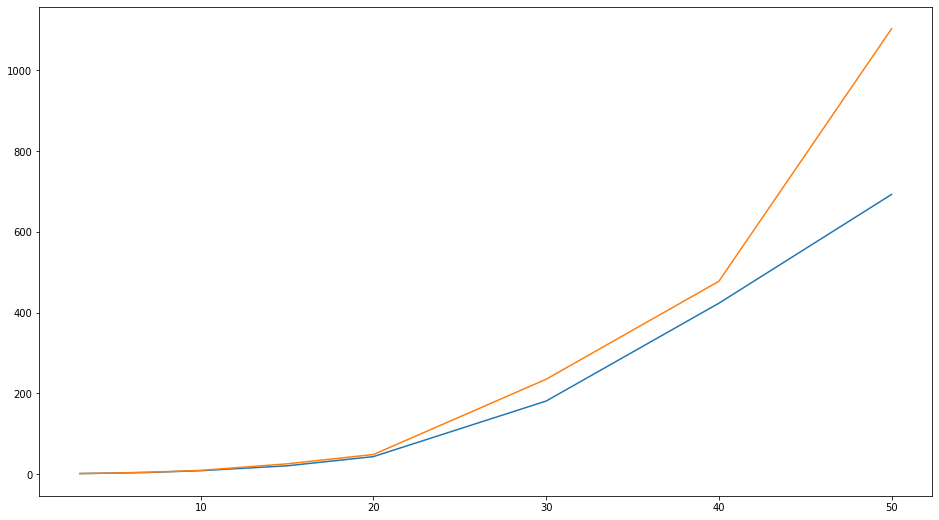

In [158]:
pref = 'L'
time={'L':[],'LR':[]}

for pref in ['L','LR']:
    for ind in inds:
        with open(('L' if pref=='L' else '')+'ctmrg_timing_'+ind+'.out') as f:
            lines = f.readlines()
        for line in lines:
            if len(line) > 8:
                if line[0:6] == "Whole ":
                    #print(int(ind),"\t",float(line[16:-3]))
                    time[pref].append(float(line[16:-3]))

plt.clf()
plt.plot(indsint,np.array(time['L'])/15)
plt.plot(indsint,np.array(time['LR'])/15)
plt.show()

In [146]:
import Tools
from scipy.linalg import svd, norm, qr
from scipy.sparse.linalg import svds
from time import time

def truncate_TEST(A, k=-1):
    if k==-1 or k>=np.min(A.shape): return svd(A, full_matrices=False)
    return svds(A, k, which='LM')

def truncate3(A, k=-1):
    u, s, vh = svd(A, full_matrices=False)
    if k <= 0 or k >= s.shape[0]:
        return u, s, vh
    else:
        s = s[:k]
        u = (u.T[:k]).T
        vh = (vh[:k])
        return u, s, vh

0
500
0
500
0
500
0
500
0
500
0
500
0
500
0
500
0
500


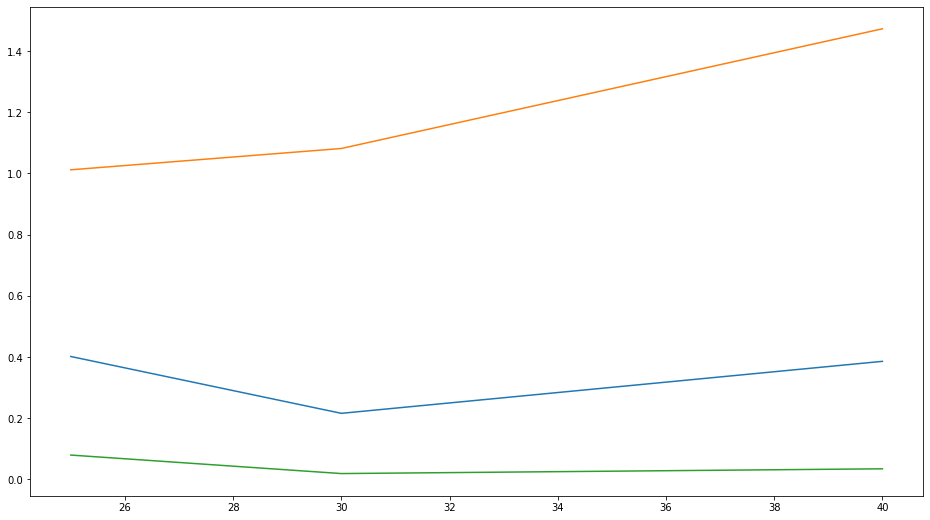

In [151]:
d1, d2 = 50, 30
delta=20
trandom, tnormal, tsparse = [], [], []
ds = [25,30,40]
iters = 1000

for d in ds:
    t0=time()
    for i in range(iters):
        if i%500==0:print(i)
        A=np.random.randn(d,d)
    trandom.append(time()-t0)
    t0=time()
    for i in range(iters):
        if i%500==0:print(i)
        A=np.random.randn(d,d)
        u,s,vh = truncate3(A,delta)
    tnormal.append(time()-t0)
    t0=time()
    for i in range(iters):
        if i%500==0:print(i)
        A=np.random.randn(d,d)
        u,s,vh = truncate_TEST(A,delta)
    tsparse.append(time()-t0)

plt.clf()
plt.plot(ds,tnormal)
plt.plot(ds,tsparse)
plt.plot(ds,trandom)
plt.show()

In [124]:
u,s,vh=truncate_TEST(A,20)

In [127]:
vh.shape

(20, 30)